# TP QP par un algorithme de points intérieurs

In [173]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC


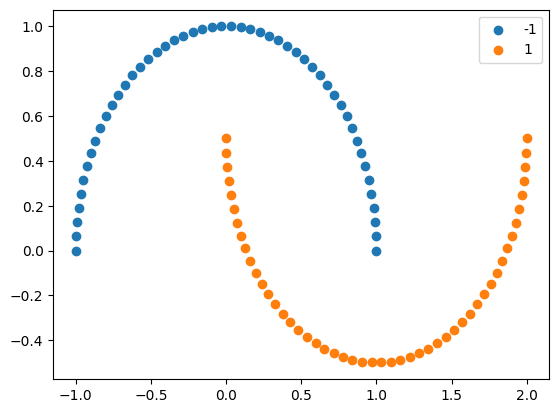

In [174]:
n_train = 100
X,y = make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)
y = np.where(y> 0.5,y,-1)
for j in np.unique(y):
    plt.scatter(X[y==j,0],X[y==j,1],label=j)
plt.legend()



In [175]:
#%% SVM dual 
C =1000
N = X.shape[0]

from sklearn.metrics.pairwise import rbf_kernel
gamma = 1
N = X.shape[0]
K = rbf_kernel(X,gamma = gamma)
yb = y.reshape(N,1)
P = K*(yb@yb.T)
q = -np.ones(N)

clf = SVC(C=C,kernel='precomputed')
clf.fit(K, y)
indice_SV = clf.support_
alpha_sk = clf.dual_coef_[0]
b_sk = clf.intercept_

# construire le vecteur solution alpha_0

# %% 
alpha_o = np.zeros(N)
alpha_o[indice_SV] = np.abs(alpha_sk)
print('cout opt',0.5*alpha_o.T@P@alpha_o + q.T@alpha_o)

# calculer la valeur objective optimale du problème QP obtenu par ce solveur SVM
# et afficher le résultat




cout opt -16.61787872191733


On s'interesse au problème
$$
\min_{\alpha} \frac{1}{2} \alpha^\top P \alpha + q^\top \alpha  \quad \text{ } \quad \text{sc } \quad \alpha^\top y = 0  \text{ et } \alpha \geq 0
$$

In [183]:
# Algorithme de point intérieur 

# construction du problème et des matrices associés

q = -np.ones(N)
b = np.array([0.0])
A = y.reshape(1,N)

# initialization du point intérieur

alpha = np.random.rand(N)*1e-2
nb_constraint = A.shape[0]

ll = np.ones((nb_constraint,1)) # multiplicateur de Lagrange
s = ((P@alpha   + q).reshape(N,1) - A.T@ ll).reshape(N)
s = np.where(s < 0.000001, 1e-16, s)  # on garde que les parties positives pour que s soit faisable

print('cout init',0.5*alpha.T@P@alpha + q.T@alpha)


cout init -0.503754296548304


In [185]:
x=alpha
sigma = 0.5
for i in range(400):
    tau = x@s/N
    Sk = np.diag(s)
    Xk = np.diag(x)
    cout = 0.5*x.T@P@x + q.T@x
    if i%100 == 0:
        print('cou',cout)
    # construire les lignes de la Jacobienne
    # inserer votre code ici
    J1=np.hstack((P,-A.T,-np.eye(N)))
    J2=np.hstack((A,np.zeros((nb_constraint,nb_constraint)),np.zeros((nb_constraint,N))))
    J3=np.hstack((Sk,np.zeros((N,nb_constraint)),Xk))
    # construire la Jacobienne
    J = np.vstack((J1,J2,J3))  

    
    # construire les lignes du second membre(F(x))
    b1 = (P@x + q - s - (A.T@ll).flatten()).reshape(N,1)
    b2 = A@x-b
    b3 = (Xk@s-sigma*tau*np.ones(len(X))).reshape(N,1)
    
    second_membre = np.vstack((b1,b2,b3))
    
    # résoudre le problème
    J = J +1e-6*np.eye(2*N+nb_constraint)
    S = np.linalg.solve(J, -second_membre)
    
    # extraire les directions pour chaque partie
    dx =S[:N].flatten()
    dy = S[N:N+1].flatten()
    ds = S[N+1:].flatten() 
    
    # définir le pas optimal 
    step=1.
    while np.any(x+step*dx < 0) or np.any(s+step*ds < 0):
        step=0.5*step
    if i%100 == 0:
        print('step',step)
    # mise à jour
    x = x + step*dx
    ll = ll + step*dy
    s = s + step*ds

cou -0.503754296548304
step 0.000244140625
cou -16.61879673181688
step 1.0
cou -16.618796731816882
step 3.1861838222649046e-58
cou -16.618796731816882
step 1.210184973390412e-122




1.   Montrer que le cout décroit correctement
2.   Comparer la solution alpha avec celui obtenu par le solveur SVM
3.   Améliorer la boucle pour avoir une condition de sortie plus pertinente





Modifier les matrices proposées en entrée de cette algorithme afin de résoudre le problème complet
$$
\min_{\alpha} \frac{1}{2} \alpha^\top P \alpha + q^\top \alpha  \quad \text{ } \quad \text{sc } \quad \alpha^\top y = 0  \text{ et } C \geq \alpha \geq 0
$$

In [124]:
b1 = (P@x + q - s - (A.T@ll).flatten()).reshape(100,1)
b2 = A@x-b
b3 = (Xk@s-0.5*np.ones(len(X))).reshape(100,1)

second_membre = np.vstack((b1,b2,b3))
second_membre

array([[-1.90086663],
       [-1.        ],
       [-1.        ],
       [-1.        ],
       [-1.86324537],
       [-1.        ],
       [-1.        ],
       [-1.        ],
       [-1.        ],
       [-1.        ],
       [-1.        ],
       [-1.88490481],
       [-1.90706331],
       [-1.91941472],
       [-1.87752551],
       [-1.        ],
       [-1.        ],
       [-1.        ],
       [-1.        ],
       [-1.9241776 ],
       [-1.        ],
       [-1.        ],
       [-1.91148611],
       [-1.89229697],
       [-1.86489381],
       [-1.88087264],
       [-1.        ],
       [-1.        ],
       [-1.        ],
       [-1.86684092],
       [-1.89650124],
       [-1.        ],
       [-1.89877077],
       [-1.        ],
       [-1.        ],
       [-1.        ],
       [-1.85954376],
       [-1.90281609],
       [-1.        ],
       [-1.        ],
       [-1.8769576 ],
       [-1.8646176 ],
       [-1.        ],
       [-1.87443653],
       [-1.88801096],
       [-1